In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler                   

def load_images(path, target_size=(64, 64), batch_size=64):
    images = []
    labels = []

    for root, dirs, files in os.walk(path):
        for filename in files:
            image_path = os.path.join(root, filename)
            # Extract the label from the immediate parent folder
            label = os.path.basename(os.path.dirname(image_path))
            image = cv2.imread(image_path)
            if image is not None:
                image = cv2.resize(image, target_size)
                images.append(image)
                labels.append(label)

    return images, labels
    

    


In [2]:
def convert_gray(images):
    gray_images = []
    for image in images:
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        gray_images.append(gray_image)
    return gray_images

    
def image_enhancement(images, labels):
    equalized_images = []
    
    # Convert images to grayscale
    gray_imgs = convert_gray(images)
    
    # Apply histogram equalization
    for img in gray_imgs:
        equ = cv2.equalizeHist(img)
        equalized_images.append(equ)
    
    # Display the equalized images
    for i, (image, label) in enumerate(zip(equalized_images, labels)):
        if i == 0 or i == len(equalized_images) - 1:
            plt.figure(figsize=(8, 4))
            plt.imshow(image, cmap='gray')
            plt.title('Equalized Image - ' + label)
            plt.axis('off')
            plt.show()
            
    
    return equalized_images


In [3]:
def feature_extraction(norm_imgs):
    features = []
    for img in norm_imgs:
        # Calculate the HOG features for each image
        fd, hog_image = hog(img, orientations=9, pixels_per_cell=(16, 16),
                             cells_per_block=(2, 2), visualize=True)
        features.append(fd)
    return features

def min_max_scaling(x_train, x_test):
    scaler = MinMaxScaler()
    x_train_scaled = scaler.fit_transform(x_train)
    x_test_scaled = scaler.transform(x_test)
    return x_train_scaled, x_test_scaled

def train_test_split_custom(features, labels):
    x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    # Scale the features
    x_train_scaled, x_test_scaled = min_max_scaling(x_train, x_test)
    
    return x_train_scaled, x_test_scaled, y_train, y_test
    
def classifier_training(x_train, y_train):
    clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
    clf.fit(x_train, y_train)
    return clf

def classifier_testing(model, x_test, y_test):
    y_pred = model.predict(x_test)
    return y_pred

def calculate_metrics(y_test, y_pred):
    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print("Precision:", prec)
    print("Recall:", recall)
    print("F1_)score:", f1)


In [4]:
directory = r"C:\Users\arith\Downloads\itmla3_project_dataset\CONCRETE CRACKS"
images, labels = load_images(directory)


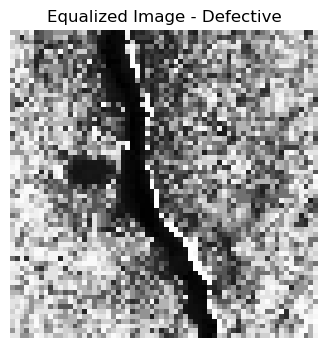

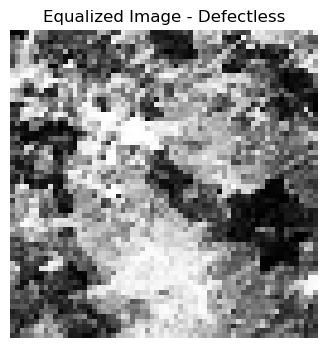

In [5]:
equ = image_enhancement(images, labels)

In [6]:
# Feature extraction
features = feature_extraction(equ)



# Train-test split
x_train, x_test, y_train, y_test = train_test_split_custom(features, labels)

# Classifier training
model = classifier_training(x_train, y_train)

# Classifier testing
y_pred = classifier_testing(model, x_test, y_test)

# Calculate metrics
calculate_metrics(y_test, y_pred)

Precision: 0.9387709003911615
Recall: 0.9384692346173087
F1_)score: 0.9384612268112243
